# Entropy

##### Keywords: entropy,  maxent, binomial, normal distribution, statistical mechanics

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

//anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Contents
{:.no_toc}
* 
{: toc}

##  Information and Entropy

Imagine tossing a coin. If I knew the exact physics of the coin, the initial conditions of the tossing, I could predict deterministically how the coin would land. But usually, without knowing anything, I say by symmetry or by "long-run" experince that the odds of getting heads are 50%.

This reflects my minimal knowledge about this system. Without knowing anything else about the universe...the physics, the humidity, the weighting of the coin, etc..assuming a probability of 0.5 of getting heads is the most conservative thing I could do. 

You can think of this as a situation with minimal information content.

It is a very interesting situation, however, when you think about this from the perspective of the multiple ways you could get half the coin tosses in a long run of coin tosses come up heads. There is only one way in which you can get all coin tosses come up heads. There are $n \choose n/2$ ways  on the other hand in which you can get half heads! You can think of this situation being one of more states or events being consistent with a probability of heads of 0.5 than with a probability of 1.

By the same token, an election with a win probability of 0.99 isnt that interesting. A lot of information went into getting this probability presumably: polls, economic modelling, etc. But to get such certainty implies a greater determinism-to-randomness ratio in the process.

One can think of **information as the reduction in uncertainty from learning an outcome**

Clearly we need a measure of uncertainty so that we can quantify how much it has decreased.

### Desiderata for a measure of uncertainty

- must be continuous so that there are no jumps
- must be additive across events or states, and must increase as the number of events/states increases

## Entropy measures uncertainty

A function that satisfies these desiderata is the information entropy:

$$H(p) = - E_p[log(p)] = - \int p(x) log(p(x))dx \,\,\,OR\, - \sum_i p_i log(p_i) $$

Thus the entropy is the average log probability of an event...

### Example of the coin toss or Bernoulli variable

$$H(p) = - E_p[log(p)] = - p*log(p) - (1-p)*log(1-p)$$

For  $p=0$ or $p=1$ we must use L'Hospital's rule: if we have the division of two limits as $0/0$ or $\infty/\infty$ then differentiate both the numerator and denominator and try again:

$$\lim_{p \to 0}  \frac{log(p)}{1/p} =  \lim_{p \to 0}  \frac{1/p}{-1/p^2} = 0$$

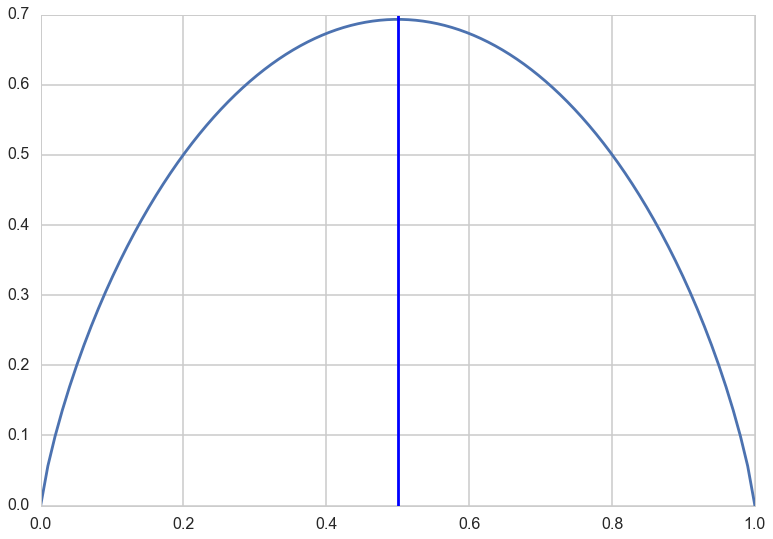

In [2]:
import math
p = np.linspace(0,1,100)
def h(p):
    if p==1.:
        ent = 0
    elif p==0.:
        ent = 0
    else:
        ent = - (p*math.log(p) + (1-p)* math.log(1-p))
    return ent
plt.plot(p, [h(pr) for pr in p]);
plt.axvline(0.5, 0, 1,'r')

Thus you can see there is maximal uncertainty at 0.5.

## Thermodynamic notion of Entropy

Imagine dividing $N$ objects amongst $M$ bins. One can think of this as stone tossing, where we toss N stones and see in which bin they land up. There is a distribution for this, $\{p_i\}$, of-course, so lets see what it is.

There are $N$ ways to fill the first bin, $N-1$ ways to fill the second, $N-2$ ways to fill the third, and so on...thus $N!$ ways. Since we dont distinguish the arrangement of objects in each bin we must divide bu the factorial of the bin amounts. If we then assume a uniform chance of landing in each bucket, then we just get the nultinomial distribution:

$$P(n_1, n_2, ..., n_M) = \frac{N!}{\prod_{i} n_i!} \prod_i (\frac{1}{M})^{n_i} = \frac{N!}{\prod_{i} n_i!} \left(\frac{1}{M}\right)^N$$

$$ W =  \frac{N!}{\prod_{i} n_i!} $$

is called the multiplicity and the entropy is then defined as:

$$H = \frac{1}{N} log(W)$$ which is:

$$\frac{1}{N}log(P(n_i, n_2, ...,n_M))$$

with a constant term removed.


$$H = \frac{1}{N} log(N!) - \frac{1}{N} \sum_i log(n_i!)$$.

Using Stirling's approximation $log(N!) \sim Nlog(N) -N$ as $N \to \infty$ and where the fractions $n_i/N$ are held fixed:

$$ H =  \frac{1}{N}\left( N log(N) - N - \sum_i (n_i log(n_i) - n_i)\right)$$

$$ = log(N) -1 -\frac{1}{N} \sum_i (Np_i log(Np_i) - Np_i) = log(N) -1 - \sum_i \left(p_i(log(N) + log(p_i)) - p_i\right)$$

Thus

$$H = -\sum_i p_i log(p_i)$$

If the probabilities of landing in each bucket are not equal, ie not uniform, then we can show:

$$\frac{1}{N}log(P(n_i, n_2, ...,n_M)) = -\sum_i p_i log(\frac{p_i}{q_i})$$

This definition has origins in statistical mechanics. Entropy was first introduced in thermodynamics and then later interpreted as a measure of disorder: how many events or states can a system constrained to have a given enrgy have. A physicist calls  a particular arrangement $\{n_i\} = (m_1, n_2, n_3,...,n_M)$ a microstate and the overall distribution of $\{p_i\}$, here the multinomial , a macrostate, with $W$ calledthe weight.

## Maximum Entropy (maxent)

Maximum entropy is the notion of finding distributions consistent with constraints and the current state of our knowledge . In other words, what would be the least surprising distribution? The one with the least additional assumptions?

We can maximize

$$H = -\sum_i p_i log(p_i)$$

in the case of the ball and bin model above, by considering the langrange-multiplier enhanced, constraint enforcing entropy

$$H = -\sum_i p_i log(p_i) + \lambda \left( \sum_i p(x_i) - 1 \right)$$

$$\frac{\partial H}{\partial p_j} = 0 \implies -(1+log(p_j)) + \lambda = 0$$

This means that the $p_j$'s are all equal and thus must be $\frac{1}{M}$: thus the  distribution with all $p$s equal maximizes entropy.

The distribution that can happen in the most ways is the one with the highest entropy, as we can see above.

### Normal as maxent

The origin story of the gaussian itself is that  many small effects add up to produce them. It is exactly the "many" aspect os these that makes the gaussian a maxent distribution. For every sequence that produces an unbalanced outcome(like a long string of heads), there are many more ways of producing a balanced outcome. In otherwords, there are so many microstates of the system that can produce the "peak" macrostates.

This is a plot from McElreath of a bunch of generalized normal distributions. with same mean and variance. The Gaussuan has the highest entropy, as we shall prove below.

![](images/gen_norm.png)

If you think about entropy increasing as we make a distribution flatter, you realize that the shape must come about because finite and equal variance puts a limit on how wide the distribution can be.

$$\renewcommand{kld}{D_{KL}}$$

For a gaussian

$$p(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-(x - \mu)^2/2\sigma^2}$$

$$H(p) = E_p[log(p)] = E_p[-\frac{1}{2}log(2\pi\sigma^2) - (x - \mu)^2/2\sigma^2]$$

$$ =  -\frac{1}{2}log(2\pi\sigma^2) - \frac{1}{2\sigma^2}E_p[(x - \mu)^2] = -\frac{1}{2}log(2\pi\sigma^2) - \frac{1}{2} = \frac{1}{2}log(2\pi e \sigma^2)$$

No other distribution $q$ can have higher entropy than this, provided they share the same variance and mean.

To see this consider (note change in order, we are considering $\kld(q, p)$:

$$\kld(q, p) = E_q[log(q/p)] = H(q,p) - H(q)$$

$$H(q,p) = E_q[log(p)] = E_q[-\frac{1}{2}log(2\pi\sigma^2) - (x - \mu)^2/2\sigma^2] \\= -\frac{1}{2}log(2\pi\sigma^2) - \frac{1}{2\sigma^2}E_q[(x - \mu)^2]$$

The second expectation here is the variance $\s
igma^2$ on the assumption that $E_q[x] = \mu$.

Thus

$$H(q,p) =  -\frac{1}{2}log(2\pi\sigma^2) - \frac{1}{2} =  -\frac{1}{2}log(2\pi e \sigma^2) = H(p)$$

Now as we have shown $\kld(q,p) >=0$. This means that  $H(q,p) - H(q) >= 0$. Which then means that $H(p) - H(q) >= 0$ or $H(p) >= H(q)$. This means that the Gaussian has the highest entropy of any distribution with the same mean and variance.

See http://www.math.uconn.edu/~kconrad/blurbs/analysis/entropypost.pdf for details on maxent for distributions.

### Binomial as Maxent

Information entropy increases as a probability distribution becomes more even. We saw that with the thermodynamic idea of entropy and the multinomial distribution.

Consider the situation when:

- only two outcomes (unordered) are possible.
- the process generating the outcomes is invariant in time, ie  the expected value remains constant (over temporal or other subsequences)

Then it turns out that  for these constraints, the maximum entropy distribution is the binomial.  The binomial basically spreads probability out as evenly and conservatively as possible, making sure that outcomes that have many more ways they can happen have more probability mass. Basically the binomial figures the number of ways any possible sequence of data can be realized, which is what entropy does. Thus it turns out that likelihoods derived by such counting turn out to be maximum entropy likelihoods.

$$H(q,p) >= H(q) \implies -E_q[log(p)] >= -E_q[log(q)]$$

For binomial parameter $\lambda/n$:

$$ H(q, p) = - \sum_i q_i log(p_i) = -\sum_i q_i \left(log \left(\frac{\lambda}{n}\right)^{x_i}  + log \left(\frac{n-\lambda}{n}\right)^{n - x_i} \right)$$

$$ =  - \sum_i q_i \left( x_i log\left(\frac{\lambda}{n}\right) + (n - x_i) log \left(\frac{n-\lambda}{n}\right)\right)$$

$$ =  - \sum_i q_i  \left( x_i log \left(\frac{\lambda}{n-\lambda}\right)  + n log \left(\frac{n-\lambda}{\lambda}\right) \right)$$

$$ H (q, p) =  - n log \left(\frac{n-\lambda}{\lambda}\right) -  log\left(\frac{\lambda}{n-\lambda}\right)E_q[x]$$

Now, if $E_q[x] = \lambda$, our invariant expectation, we have $H(q,p) = H(p)$ as we get the same formula if we substitute $q=p$ to get the entropy of the binomial. In other words, $H(p) >= H(q)$ and we have shown the binomial has maximum entropy amongst discrete distributions with two outcomes and fixed expectations.

## The importance of maxent

The most common distributions used as likelihoods (and priors) in modeling are those in the exponential family. The exponential family can be defined  as having pmf or pdf:

$$p(x|\theta) =  \frac{1}{Z(\theta)} h(x) e^{\theta^T\phi(x)}$$

Where $Z(\theta)$, also called the partition function, is the normalization.

For example, the univariate Gaussian Distribution can be obtained with:

$$
\begin{eqnarray}
\theta &=& \begin{pmatrix}\mu/\sigma^2 \\-1/2\sigma^2\end{pmatrix}\\
\phi(x) &=&  \begin{pmatrix}x \\x^2\end{pmatrix}\\
Z(\mu, \sigma^2) &=& \sigma\sqrt{2\pi} e^{\mu^2/2\sigma^2}\\
h(x) &=& 1
\end{eqnarray}
$$

Each member of the exponential family turns out to be a maximum entropy distribution subject to different constraints. These distributions are then used as likelihoods. 

![](images/expofamily.png)


For example, the gamma distribution, which we shall see later, is maximum entropy amongst all distributions with the same mean and same average logarithm. The poisson distribution, used for low event rates,  is maxent under similar conditions as the binomial as it is  a special case of the binomial. The exponential distribution is maxent among all non-negative continuous distributions with the same average inter-event displacement. (In our births example, the inter-birth time).

We'll talk more about these distributions when we encounter them, and when we talk about generalized linear models.

But here is the critical point. We will often choose a maximum entropy distribution as a likelihood . Information entropy ennumerates the number of ways a distribution can arise, after having fixed some assumptions. Thus, in choosing a MAXENT distribution as a likelihood, we choose a distribution that once the constraints has been met, does not contain any additional assumptions. It is thus the most conservative distribution we could choose consistent with our constraints.
